# <span style="color:red"> Final Project Data 200</span>

## <span style="color:red"> Linh Nguyen May 5th 2025</span>

In [70]:
import pandas as pd
import json
import requests
import matplotlib.pyplot as plt

In [72]:
api_key = 'a4bebec7'
url = 'http://www.omdbapi.com/?'

In [74]:
def movie_list(api_key, movie_list, box_office=True,min_rating=0):
    url = 'http://www.omdbapi.com/'
    results = []
    for title in movie_list:
        params = {
            't': title,
            'apikey': api_key
        }
        response = requests.get(url, params=params)
        data = response.json()
        
        if data.get('Response') == 'True':
            imdb_rating = pd.to_numeric(data.get('imdbRating', ''))
            
            if imdb_rating >= min_rating:
                movie_data = {
                    'Title': data.get('Title'),
                    'Year': pd.to_numeric(data.get('Year', '')),
                    'Genre': data.get('Genre'),
                    'Director': data.get('Director'),
                    'Runtime': pd.to_numeric(data.get('Runtime', '').replace(' min', '')),
                    'imdbRating': imdb_rating,
                    'Metascore': pd.to_numeric(data.get('Metascore', ''))
                }
                if box_office:
                    movie_data['BoxOffice'] = pd.to_numeric(
                        data.get('BoxOffice', '').replace('$', '').replace(',', '')
                    )
                
                results.append(movie_data)
    
    df = pd.DataFrame(results)
    return df
movies = ['The Godfather', 'Parasite', 'Spirited Away', 'City of God', 'Psycho']
df = movie_list(api_key, movies, box_office=True, min_rating=8.0)
print(df.head())

           Title  Year                         Genre  \
0  The Godfather  1972                  Crime, Drama   
1       Parasite  2019               Drama, Thriller   
2  Spirited Away  2001  Animation, Adventure, Family   
3    City of God  2002                  Crime, Drama   
4         Psycho  1960     Horror, Mystery, Thriller   

                         Director  Runtime  imdbRating  Metascore  BoxOffice  
0            Francis Ford Coppola      175         9.2        100  136381073  
1                    Bong Joon Ho      132         8.5         97   53847897  
2                  Hayao Miyazaki      124         8.6         96   15205725  
3  Fernando Meirelles, Kátia Lund      130         8.6         79    7564459  
4                Alfred Hitchcock      109         8.5         97   32000000  


### <span style="color:red"> Path Explanation: </span>
The path I formed involves interacting with the OMDb API (which is relevant to my Project 1 on the Top 250 IMDb Movies), a public API that provides movie metadata, including information such as title, genre, director, IMDb rating, and box office earnings. The function movie_list uses the API link (http://www.omdbapi.com/) to retrieve data for a given list of movie titles.

The structure of the API is pretty easy to comprehend, it accepts parameters like t (title of the movie) and apikey (user’s unique key) to return movie details in a JSON format. The response contains key fields such as title, year, genre, durector, imdbRating , metascore, and box office. My function exploits this structure by:

- Sending requests for each movie title in the list (the limit is 4 movies)

- Parsing the JSON response to extract relevant data fields

- Filtering the results based on two user-specified customizations: min_rating (I customized mine to a minimum of 8.0)

The function returns a tidy Pandas DataFrame with selected fields, providing a structured overview of the movies' key information.

In [219]:
df = movie_list(api_key, movies, box_office=True, min_rating=8.0)

from tabulate import tabulate
df = movie_list(api_key, movies, box_office=True, min_rating=8.0)
print(tabulate(df, headers='keys', tablefmt='pretty', showindex=False))
df = df.sort_values(by='imdbRating', ascending=False)

+---------------+------+------------------------------+--------------------------------+---------+------------+-----------+-----------+
|     Title     | Year |            Genre             |            Director            | Runtime | imdbRating | Metascore | BoxOffice |
+---------------+------+------------------------------+--------------------------------+---------+------------+-----------+-----------+
| The Godfather | 1972 |         Crime, Drama         |      Francis Ford Coppola      |   175   |    9.2     |    100    | 136381073 |
|   Parasite    | 2019 |       Drama, Thriller        |          Bong Joon Ho          |   132   |    8.5     |    97     | 53847897  |
| Spirited Away | 2001 | Animation, Adventure, Family |         Hayao Miyazaki         |   124   |    8.6     |    96     | 15205725  |
|  City of God  | 2002 |         Crime, Drama         | Fernando Meirelles, Kátia Lund |   130   |    8.6     |    79     |  7564459  |
|    Psycho     | 1960 |  Horror, Mystery, Thril

### <span style="color:red"> Tidy Data: </span>
The transformed data is tidy data because it meets the requirements. Each variable, such as title, year, genre, box office, and runtime, forms a distinct column, and each observation or general info about a movie (title, year, director, genre, imdbRating, etc.) is represented as a single row. The data is sorted so that movies descend from highest to lowest imdb Rating (even though Parasite is second and Psycho is last despite both having the same imdbRating, I think the Metascore may have something to do with this order). This structure makes the data clean, analyzable, and easy for visualization.

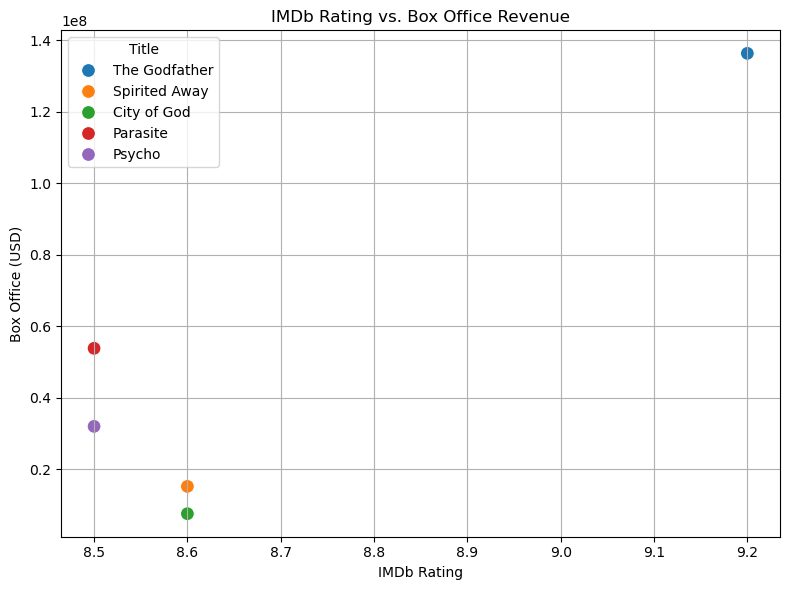

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x='imdbRating', y='BoxOffice', hue='Title', s=100)

plt.title('IMDb Rating vs. Box Office Revenue')
plt.xlabel('IMDb Rating')
plt.ylabel('Box Office (USD)')
plt.grid(True)
plt.tight_layout()
plt.show()

/var/folders/9j/p7_fk1hj553f2kc_qwc90c8m0000gn/T/ipykernel_9405/3485791400.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=avg_metascore_by_genre, x='Metascore', y='Genre', palette='coolwarm')


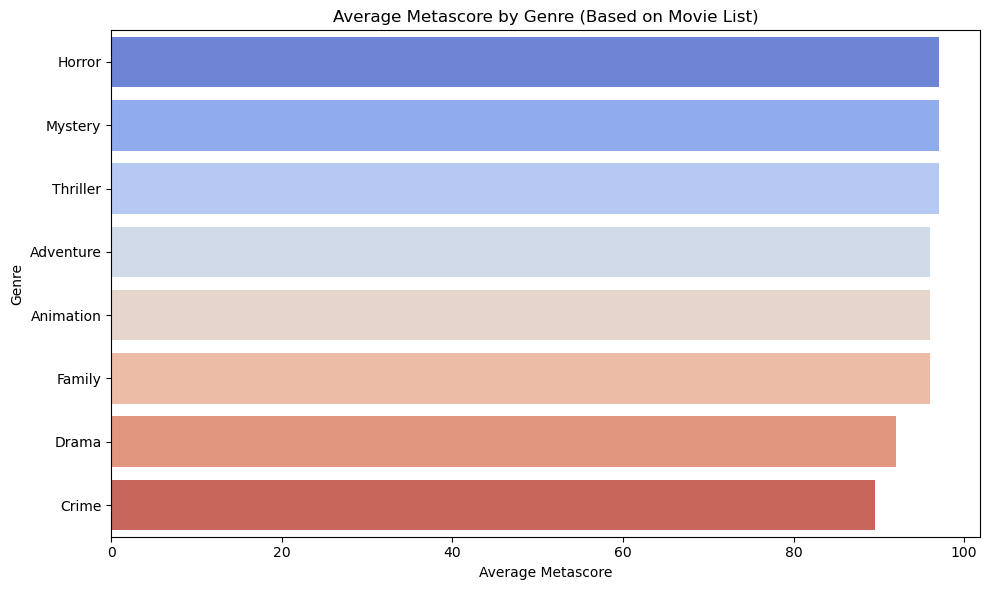

In [210]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df_genres = df.copy()
df_genres['Genre'] = df_genres['Genre'].str.split(', ')
df_genres = df_genres.explode('Genre')

df_genres = df_genres.dropna(subset=['Metascore'])

avg_metascore_by_genre = df_genres.groupby('Genre')['Metascore'].mean().sort_values(ascending=False).reset_index()
plt.figure(figsize=(10, 6))
sns.barplot(data=avg_metascore_by_genre, x='Metascore', y='Genre', palette='coolwarm')

plt.title('Average Metascore by Genre (Based on Movie List)')
plt.xlabel('Average Metascore')
plt.ylabel('Genre')
plt.tight_layout()
plt.show()


### <span style="color:red"> Observation: </span>
It's interesting to see that The Godfather, though highest in imdbRating and amassed the largest box office, its Crime
genre has the lowest average Metascore compared to that of the other genres in the selected movies. This likely proves that critical reception of a genre is not always aligned with individual standout films within it. While The Godfather is widely regarded as a cinematic masterpiece, but the broader Crime genre in this sample may include films that critics rated less favorably, pulling down the average. This emphasizes how a genre's overall critical appeal can differ from the acclaim received by its most iconic representatives. The Crime genre could also be seeing a decline in quality, a lot of Crime movies coming out today don't have the same substance as the classics do.

In [191]:
import pandas as pd
film_df = pd.read_csv('IMDB Top 250 Movies.csv')
grouped_data = film_df.groupby('genre').agg(mean_rating=('rating', 'mean'),total_movies=('name', 'count'),max_year=('year', 'max')
)

df_exploded = df.copy()
df_exploded['Genre'] = df_exploded['Genre'].str.split(', ')
df_exploded = df_exploded.explode('Genre')

df_exploded['Genre'] = df_exploded['Genre'].str.strip().str.lower()
grouped_data = grouped_data.reset_index()
grouped_data['genre'] = grouped_data['genre'].str.strip().str.lower()

df_genre_avg = df_exploded.groupby('Genre').agg(
    avg_imdb_rating=('imdbRating', 'mean'),
    total_box_office=('BoxOffice', 'sum')
).reset_index()

merged_df = pd.merge(df_genre_avg,grouped_data,left_on='Genre',right_on='genre', how='inner')
print(merged_df)

    Genre  avg_imdb_rating  total_box_office   genre  mean_rating  \
0   drama              8.8         197793429   drama          8.3   
1  horror              8.5          32000000  horror          8.1   

   total_movies  max_year  
0            19      2018  
1             1      1973  


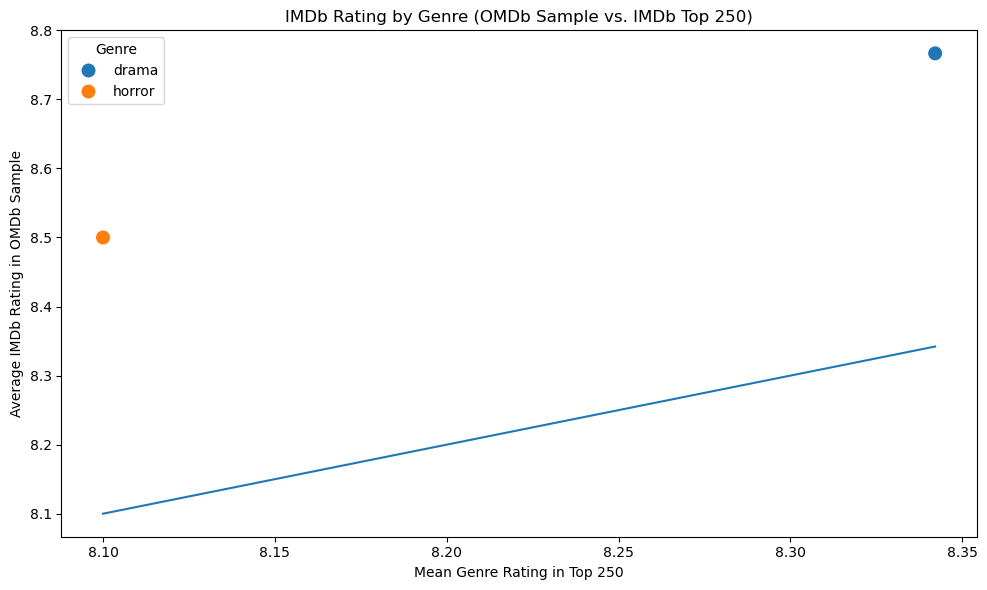

In [167]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(data=merged_df,x='mean_rating',y='avg_imdb_rating',hue='Genre',s=120)

plt.plot([merged_df['mean_rating'].min(), merged_df['mean_rating'].max()],
         [merged_df['mean_rating'].min(), merged_df['mean_rating'].max()],
         )

plt.title('IMDb Rating by Genre (OMDb Sample vs. IMDb Top 250)')
plt.xlabel('Mean Genre Rating in Top 250')
plt.ylabel('Average IMDb Rating in OMDb Sample')
plt.tight_layout()
plt.show()

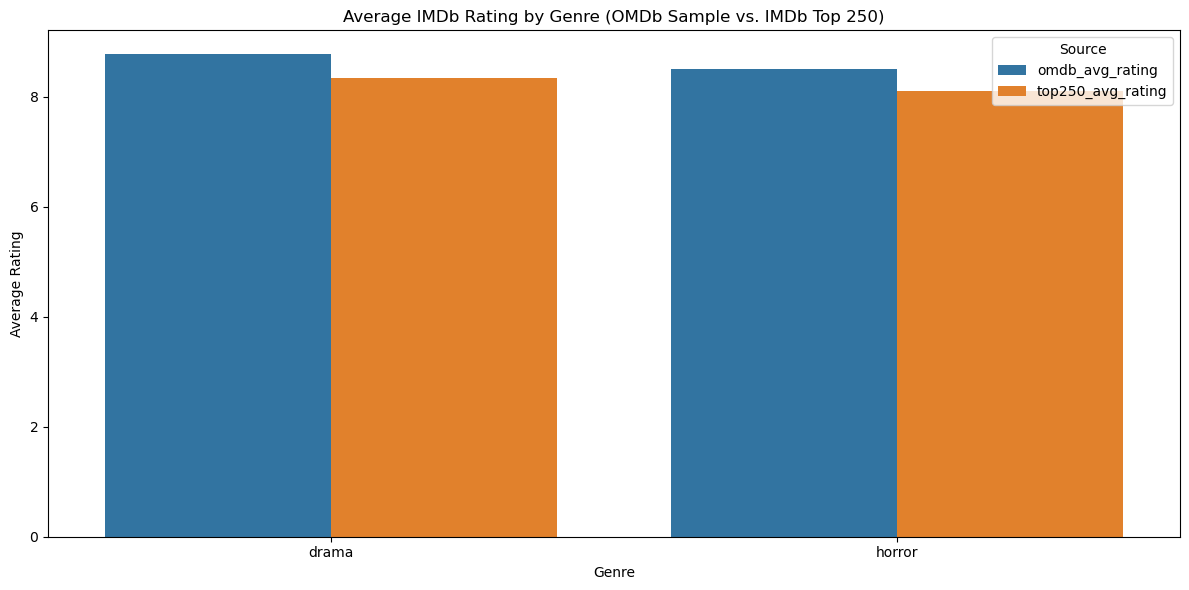

In [193]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
df_ratings = df_exploded.groupby('Genre')['imdbRating'].mean().reset_index()
df_ratings['Genre'] = df_ratings['Genre'].str.strip().str.lower()
df_ratings.rename(columns={'imdbRating': 'omdb_avg_rating'}, inplace=True)

grouped_data_reset = grouped_data.reset_index()
grouped_data_reset['genre'] = grouped_data_reset['genre'].str.strip().str.lower()
grouped_data_reset.rename(columns={'mean_rating': 'top250_avg_rating'}, inplace=True)
combined_ratings = pd.merge(df_ratings, grouped_data_reset[['genre', 'top250_avg_rating']], 
                            left_on='Genre', right_on='genre', how='inner')

combined_ratings = combined_ratings.sort_values(by='top250_avg_rating', ascending=False)
melted = pd.melt(combined_ratings, id_vars='Genre', 
                 value_vars=['omdb_avg_rating', 'top250_avg_rating'], 
                 var_name='Source', value_name='Average Rating')

plt.figure(figsize=(12, 6))
sns.barplot(data=melted, x='Genre', y='Average Rating', hue='Source')
plt.title('Average IMDb Rating by Genre (OMDb Sample vs. IMDb Top 250)')
plt.ylabel('Average Rating')
plt.tight_layout()
plt.show()

### <span style="color:red"> Final Thoughts: </span>
4. I created 2 visualizations comparing average IMDB ratings from the OMDb API and the Top 250 dataset for each genre (only 2 genres showed up). These visualizations reveal a consistent pattern, which is Drama and Horror not only dominate in quantity but also maintain high average ratings across both datasets. The bar chart makes it easy to compare how public ratings (OMDb) align or differ from curated lists (Top 250). In this case, the rating for both are pretty much similar in 2 datasets, though both genres are slightly rated higher in the OMDb dataset. 

5. The additional OMDb data and this project partially supports my original conclusions by reaffirming that genres like Drama tend to consistently receive high ratings and remain popular. Horror didn't show up in the Top 10 Genres in Project 1's visualization, but the illustration here suggests that Horror is also well-liked and popular. The limited genre diversity in the merged dataset highlights a potential flaw in the data collection process or in the representation of genres between datasets. This makes it difficult to fully compare public opinion (OMDb) with curated rankings (Top 250). It raises new questions. Why are only two genres appearing in the merged results? Are genre labels inconsistent or incomplete across datasets? To investigate further, I would examine how genres are formatted in these datasets. Next steps would also involve expanding the OMDb dataset with more movie titles, having better genre coverage, and exploring whether specific directors, release decades, or countries influence which genres rise to the top in ratings.